In [1]:
import geopandas as gpd

### 读取数据并查看crs：

In [2]:
world = gpd.read_file('./datasets/naturalearth_lowres/naturalearth_lowres.shp')
world = world[world.name!="Antarctica"] # 删除南极洲
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
171,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
172,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
173,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
174,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [3]:
cities = gpd.read_file('./datasets/naturalearth_cities/naturalearth_cities.shp')

<AxesSubplot:>

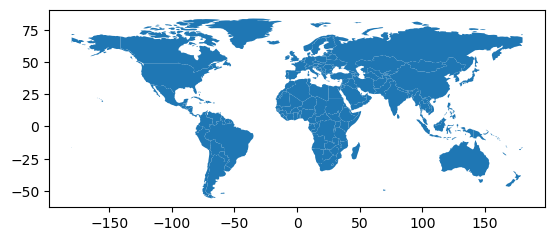

In [4]:
world.plot()

<AxesSubplot:>

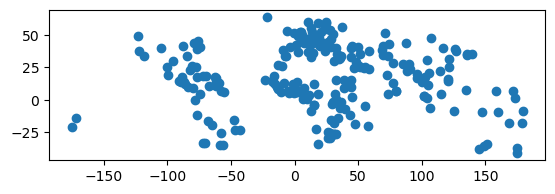

In [5]:
cities.plot()

In [6]:
# 查看CRS
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# 1.绘图：

## 方法一：

<AxesSubplot:>

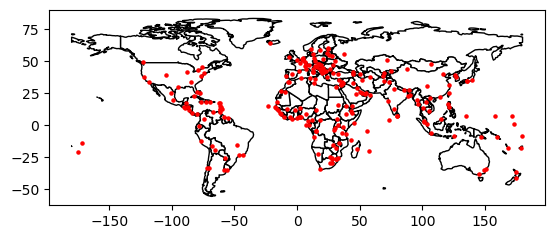

In [8]:
base = world.plot(color='white', edgecolor='black')
cities.plot(ax=base, marker='o', color='red', markersize=5)

## 方法二： 使用 matplotlib 对象

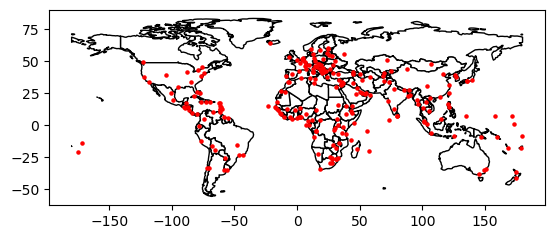

In [9]:
import matplotlib.pyplot as plt

fig , ax = plt.subplots()

ax.set_aspect(aspect="equal") 

world.plot(ax=ax , color='white' , edgecolor='black')

cities.plot(ax=ax, marker='o', color='red', markersize=5)

plt.show()

# 2.控制图层顺序：

### 例如，下面的示例中，如果没有指定 zorder，基于默认顺序，城市（点）将绘制在世界（多边形）下方。

<AxesSubplot:>

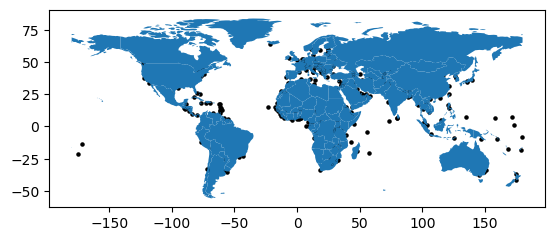

In [10]:
ax = cities.plot(color='k', markersize=5 )
world.plot(ax=ax)

### 绘制多层时，使用 zorder 来控制绘制图层的顺序。 zorder 越低，图层在地图上越处于底层，反之亦然。

### 我们可以将城市的 zorder 设置为高于世界的 zorder 以将其移至顶部。

<AxesSubplot:>

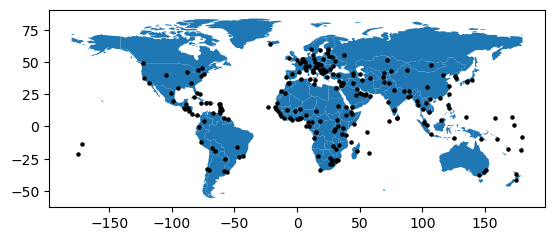

In [11]:
ax = cities.plot(zorder=2, color='k', markersize=5 )
world.plot(ax=ax , zorder=1)